# Data Preprocessing and Feature Engineering for Cybersecurity Attacks Dataset

This notebook implements Phase 2 of the cybersecurity attacks analysis plan. We'll focus on cleaning the dataset and developing meaningful features for modeling.

**Goals:**
- Handle missing values in the dataset
- Encode categorical variables
- Normalize or standardize numerical features
- Create time-based features
- Generate network-based features
- Create interaction features
- Apply feature scaling
- Implement dimensionality reduction
- Split data into training, validation, and test sets

## 1. Import Required Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import warnings
import os
from datetime import datetime

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set random seed for reproducibility
np.random.seed(42)

# Set visualization style
sns.set_style('whitegrid')

# Define color palette for consistency
COLOR_PALETTE = [
    "#c6d4e1",  # light blue-grey
    "#9bbcd4",  # soft blue
    "#6fa3c7",  # medium blue
    "#4a8ab8",  # strong blue
    "#2f6fa1",  # deep blue
    "#1f4f75",  # navy
    "#d3d3d3",  # light grey
    "#a9a9a9",  # medium grey
    "#696969",  # dark grey
]

# Suppress warnings
warnings.filterwarnings('ignore')

## 2. Load the Dataset

We'll load the cleaned cybersecurity attacks dataset that was prepared in the previous phase.

In [2]:
# Define the file path
file_path = '../cybersecurity_attacks_data/cleaned_cybersecurity_attacks.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Create a copy to preserve original data
df_original = df.copy()

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"\nFeature names: {list(df.columns)}")
print(f"\nData types:\n{df.dtypes}")
df.head()

Dataset shape: (40000, 31)

Feature names: ['Timestamp', 'Source IP Address', 'Destination IP Address', 'Source Port', 'Destination Port', 'Protocol', 'Packet Length', 'Packet Type', 'Traffic Type', 'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level', 'Network Segment', 'Geo-location Data', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source', 'Browser', 'Device/OS', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'DayOfWeek']

Data types:
Timestamp                  object
Source IP Address          object
Destination IP Address     object
Source Port                 int64
Destination Port            int64
Protocol                   object
Packet Length               int64
Packet Type                object
Traffic Type               object
Malware Indicators         object
Anomaly Scores            float64
Alerts/Warnings            object
Attack Type                object
Attack Signature   

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Browser,Device/OS,Year,Month,Day,Hour,Minute,Second,DayOfWeek
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,IoC Detected,28.67,no,Malware,Known Pattern B,Logged,Low,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,No Data,Server,Mozilla,Windows,2023,5,30,6,33,58,1
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,IoC Detected,51.50,no,Malware,Known Pattern A,Blocked,Low,Segment B,"Bilaspur, Nagaland",No proxy,Log Data,No Data,Firewall,Mozilla,Windows,2020,8,26,7,8,30,2
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,IoC Detected,87.42,yes,DDoS,Known Pattern B,Ignored,Low,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall,Mozilla,Windows,2022,11,13,8,23,25,6
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,No Detection,15.79,yes,Malware,Known Pattern B,Blocked,Medium,Segment B,"Jaunpur, Rajasthan",No proxy,No Data,Alert Data,Firewall,Mozilla,Macintosh,2023,7,2,10,38,46,6
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,No Detection,0.52,yes,DDoS,Known Pattern B,Blocked,Low,Segment C,"Anantapur, Tripura",149.6.110.119,No Data,Alert Data,Firewall,Mozilla,Windows,2023,7,16,13,11,7,6


In [3]:
# Display summary statistics of numerical features
df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores,Year,Month,Day,Hour,Minute,Second,DayOfWeek
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473,2021.411375,6.288275,15.629550,11.507350,29.511825,29.591300,2.995750
std,18560.425604,18574.668842,416.044192,28.853598,1.085253,3.332979,8.771715,6.919122,17.360543,17.357387,2.004515
min,1027.000000,1024.000000,64.000000,0.000000,2020.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000,2020.000000,3.000000,8.000000,5.000000,14.000000,14.000000,1.000000
50%,32856.000000,33004.500000,782.000000,50.345000,2021.000000,6.000000,16.000000,12.000000,29.000000,30.000000,3.000000
75%,48928.250000,49287.000000,1143.000000,75.030000,2022.000000,9.000000,23.000000,17.000000,45.000000,45.000000,5.000000
max,65530.000000,65535.000000,1500.000000,100.000000,2023.000000,12.000000,31.000000,23.000000,59.000000,59.000000,6.000000


## 3. Handle Missing Values

We'll check for missing values and handle them appropriately based on the nature of each feature.

In [4]:
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a summary DataFrame of missing values
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display only columns with missing values
missing_cols = missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False)
print("Columns with missing values:")
missing_cols

Columns with missing values:


,Missing Values,Percentage


In [5]:
# Visualize missing values
if len(missing_cols) > 0:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=missing_cols.index, y='Percentage', data=missing_cols, palette=COLOR_PALETTE)
    plt.title('Percentage of Missing Values by Feature', fontsize=15)
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Percentage of Missing Values', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset!")

No missing values found in the dataset!


### 3.1 Strategy for Handling Missing Values

Based on the missing values analysis, we'll apply appropriate strategies for each feature:
- For numerical features: Impute with mean, median, or a constant depending on the distribution
- For categorical features: Impute with mode or create a 'missing' category
- For features with too many missing values: Consider dropping the feature

In [6]:
# Function to handle missing values based on data type
def handle_missing_values(df):
    df_processed = df.copy()
    
    # Get numerical and categorical columns
    num_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = df_processed.select_dtypes(include=['object', 'category']).columns
    
    # Handle numerical missing values with median imputation
    if num_cols.any():
        num_imputer = SimpleImputer(strategy='median')
        df_processed[num_cols] = num_imputer.fit_transform(df_processed[num_cols])
    
    # Handle categorical missing values with mode imputation
    for col in cat_cols:
        if df_processed[col].isnull().sum() > 0:
            # Get the most frequent value
            most_frequent = df_processed[col].mode()[0]
            # Fill missing values with the most frequent value
            df_processed[col].fillna(most_frequent, inplace=True)
    
    return df_processed

# Apply missing values handling
df = handle_missing_values(df)

# Verify no missing values remain
print(f"Missing values after imputation: {df.isnull().sum().sum()}")

Missing values after imputation: 0


## 4. Encode Categorical Variables

We'll identify categorical features and encode them appropriately for machine learning models.

In [7]:
# Identify categorical variables
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical columns: {categorical_columns}")

Categorical columns: ['Timestamp', 'Source IP Address', 'Destination IP Address', 'Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators', 'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level', 'Network Segment', 'Geo-location Data', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source', 'Browser', 'Device/OS']


In [8]:
# Examine the unique values in each categorical column
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"{col}: {len(unique_values)} unique values")
    if len(unique_values) < 20:  # Only print if there aren't too many unique values
        print(unique_values)
    print("\n")

Timestamp: 39997 unique values


Source IP Address: 40000 unique values


Destination IP Address: 40000 unique values


Protocol: 3 unique values
['ICMP' 'UDP' 'TCP']


Packet Type: 2 unique values
['Data' 'Control']


Traffic Type: 3 unique values
['HTTP' 'DNS' 'FTP']


Malware Indicators: 2 unique values
['IoC Detected' 'No Detection']


Alerts/Warnings: 2 unique values
['no' 'yes']


Attack Type: 3 unique values
['Malware' 'DDoS' 'Intrusion']


Attack Signature: 2 unique values
['Known Pattern B' 'Known Pattern A']


Action Taken: 3 unique values
['Logged' 'Blocked' 'Ignored']


Severity Level: 3 unique values
['Low' 'Medium' 'High']


Network Segment: 3 unique values
['Segment A' 'Segment B' 'Segment C']


Geo-location Data: 8723 unique values


Proxy Information: 20149 unique values


Firewall Logs: 2 unique values
['Log Data' 'No Data']


IDS/IPS Alerts: 2 unique values
['No Data' 'Alert Data']


Log Source: 2 unique values
['Server' 'Firewall']


Browser: 2 unique values
['Mozil

### 4.1 Apply Appropriate Encoding Techniques

Based on the cardinality of each categorical variable, we'll apply:
- Label Encoding: For ordinal variables or binary variables
- One-Hot Encoding: For nominal variables with low cardinality
- Target Encoding: For high cardinality variables (if needed)

In [9]:
# Function to encode categorical variables
def encode_categorical_features(df, categorical_cols):
    df_encoded = df.copy()
    
    # Dictionary to store encoders for future reference
    encoders = {}
    
    # Categorize columns based on cardinality
    binary_cols = []
    low_card_cols = []
    high_card_cols = []
    
    for col in categorical_cols:
        unique_count = df_encoded[col].nunique()
        if unique_count == 2:
            binary_cols.append(col)
        elif unique_count <= 10:  # Arbitrary threshold
            low_card_cols.append(col)
        else:
            high_card_cols.append(col)
    
    # Apply Label Encoding to binary columns
    for col in binary_cols:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        encoders[col] = {'type': 'label', 'encoder': le, 'classes': le.classes_}
    
    # Apply One-Hot Encoding to low cardinality columns
    if low_card_cols:
        # Get dummies for low cardinality features
        df_dummies = pd.get_dummies(df_encoded[low_card_cols], prefix_sep='_', drop_first=True)
        
        # Drop original columns and join the dummy variables
        df_encoded.drop(low_card_cols, axis=1, inplace=True)
        df_encoded = pd.concat([df_encoded, df_dummies], axis=1)
        
        # Store encoding information
        for col in low_card_cols:
            encoders[col] = {'type': 'one-hot', 'columns': df_dummies.columns.tolist()}
    
    # For high cardinality features, we'll use Label Encoding for now
    # In a real scenario, we might consider Target Encoding or embedding techniques
    for col in high_card_cols:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        encoders[col] = {'type': 'label', 'encoder': le, 'classes': le.classes_}
    
    return df_encoded, encoders

# Apply encoding
df_encoded, encoders = encode_categorical_features(df, categorical_columns)

# Display the first few rows of the encoded dataset
df_encoded.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Packet Length,Packet Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Signature,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Browser,Year,Month,Day,Hour,Minute,Second,DayOfWeek,Protocol_TCP,Protocol_UDP,Traffic Type_FTP,Traffic Type_HTTP,Attack Type_Intrusion,Attack Type_Malware,Action Taken_Ignored,Action Taken_Logged,Severity Level_Low,Severity Level_Medium,Network Segment_Segment B,Network Segment_Segment C,Device/OS_Linux,Device/OS_Macintosh,Device/OS_Windows,Device/OS_iPad,Device/OS_iPhone,Device/OS_iPod
0,36141,939,37091,31225.0,17616.0,503.0,1,0,28.67,0,1,3723,5143,0,1,1,0,2023.0,5.0,30.0,6.0,33.0,58.0,1.0,False,False,False,True,False,True,False,True,True,False,False,False,False,False,True,False,False,False
1,6759,35826,33418,17245.0,48166.0,1174.0,1,0,51.50,0,0,1677,20148,0,1,0,0,2020.0,8.0,26.0,7.0,8.0,30.0,2.0,False,False,False,True,False,True,False,False,True,False,True,False,False,False,True,False,False,False
2,30425,32917,19496,16811.0,53600.0,306.0,0,0,87.42,1,1,1707,1568,0,0,0,0,2022.0,11.0,13.0,8.0,23.0,25.0,6.0,False,True,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,False
3,37100,12598,592,20018.0,32534.0,385.0,1,1,15.79,1,1,3750,20148,1,0,0,0,2023.0,7.0,2.0,10.0,38.0,46.0,6.0,False,True,False,True,False,True,False,False,False,True,True,False,False,True,False,False,False,False
4,37488,34515,17716,6131.0,26646.0,1462.0,1,1,0.52,1,1,577,4967,1,0,0,0,2023.0,7.0,16.0,13.0,11.0,7.0,6.0,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False


In [10]:
# Check the shape after encoding
print(f"Original shape: {df.shape}")
print(f"Shape after encoding: {df_encoded.shape}")

# Display the encoding information
print("\nEncoding applied:")
for col, info in encoders.items():
    print(f"{col}: {info['type']} encoding")

Original shape: (40000, 31)
Shape after encoding: (40000, 42)

Encoding applied:
Packet Type: label encoding
Malware Indicators: label encoding
Alerts/Warnings: label encoding
Attack Signature: label encoding
Firewall Logs: label encoding
IDS/IPS Alerts: label encoding
Log Source: label encoding
Browser: label encoding
Protocol: one-hot encoding
Traffic Type: one-hot encoding
Attack Type: one-hot encoding
Action Taken: one-hot encoding
Severity Level: one-hot encoding
Network Segment: one-hot encoding
Device/OS: one-hot encoding
Timestamp: label encoding
Source IP Address: label encoding
Destination IP Address: label encoding
Geo-location Data: label encoding
Proxy Information: label encoding


## 5. Normalize or Standardize Numerical Features

We'll normalize or standardize numerical features to ensure they're on similar scales.

In [11]:
# Identify numerical columns (exclude any target variables)
# Assuming 'attack_type' and 'severity_level' are target variables
target_variables = ['attack_type', 'severity_level'] if ('attack_type' in df_encoded.columns and 'severity_level' in df_encoded.columns) else []
numerical_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns = [col for col in numerical_columns if col not in target_variables]

print(f"Numerical columns to normalize/standardize: {numerical_columns}")

Numerical columns to normalize/standardize: ['Timestamp', 'Source IP Address', 'Destination IP Address', 'Source Port', 'Destination Port', 'Packet Length', 'Packet Type', 'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings', 'Attack Signature', 'Geo-location Data', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source', 'Browser', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'DayOfWeek']


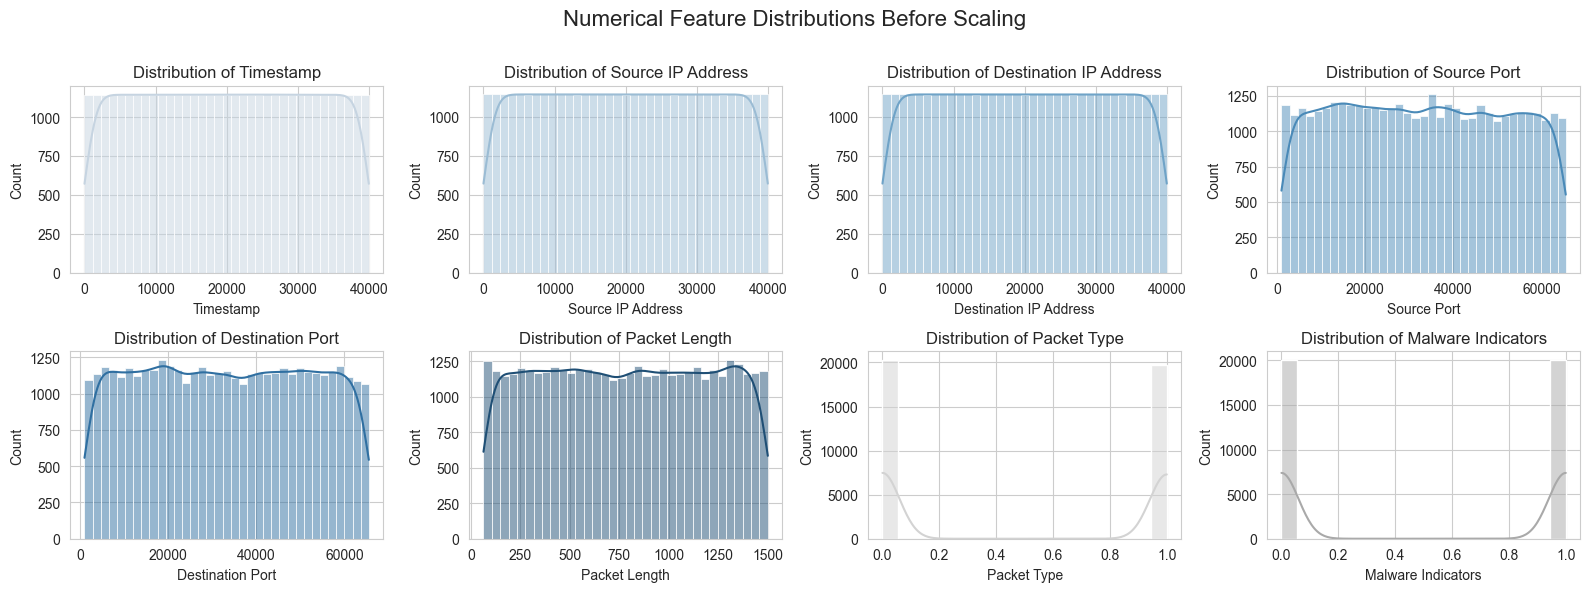

In [12]:
# Visualize the distribution of numerical features before scaling
def plot_feature_distributions(df, columns, title):
    if len(columns) > 0:
        num_cols = min(len(columns), 4)  # Limit to 4 columns per row for readability
        num_rows = (len(columns) + num_cols - 1) // num_cols
        
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 3 * num_rows))
        axes = axes.flatten() if num_rows * num_cols > 1 else [axes]
        
        for i, col in enumerate(columns):
            if i < len(axes):
                sns.histplot(df[col], kde=True, ax=axes[i], color=COLOR_PALETTE[i % len(COLOR_PALETTE)])
                axes[i].set_title(f'Distribution of {col}')
        
        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            axes[j].set_visible(False)
        
        plt.suptitle(title, fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.97])
        plt.show()

# Plot distributions of a subset of numerical features (up to 8 for readability)
plot_cols = numerical_columns[:8] if len(numerical_columns) > 8 else numerical_columns
plot_feature_distributions(df_encoded, plot_cols, 'Numerical Feature Distributions Before Scaling')

In [13]:
# Apply standardization (z-score normalization)
def standardize_features(df, columns):
    df_scaled = df.copy()
    
    if columns:
        scaler = StandardScaler()
        df_scaled[columns] = scaler.fit_transform(df_scaled[columns])
    
    return df_scaled, scaler

# Apply standardization
df_standardized, standard_scaler = standardize_features(df_encoded, numerical_columns)

# Check the scaled data
df_standardized[numerical_columns].describe().T[['mean', 'std', 'min', 'max']]

,mean,std,min,max
Timestamp,2.344791e-17,1.000013,-1.732093,1.732025
Source IP Address,2.131628e-18,1.000013,-1.732008,1.732008
Destination IP Address,1.065814e-18,1.000013,-1.732008,1.732008
Source Port,3.677059e-17,1.000013,-1.721068,1.754273
Destination Port,1.776357e-16,1.000013,-1.729628,1.743479
Packet Length,3.304024e-17,1.000013,-1.724484,1.727115
Packet Type,-2.469136e-17,1.000013,-0.988219,1.011921
Malware Indicators,0.000000e+00,1.000013,-1.000000,1.000000
Anomaly Scores,5.719869e-17,1.000013,-1.736841,1.728975
Alerts/Warnings,9.237056e-18,1.000013,-0.996656,1.003356


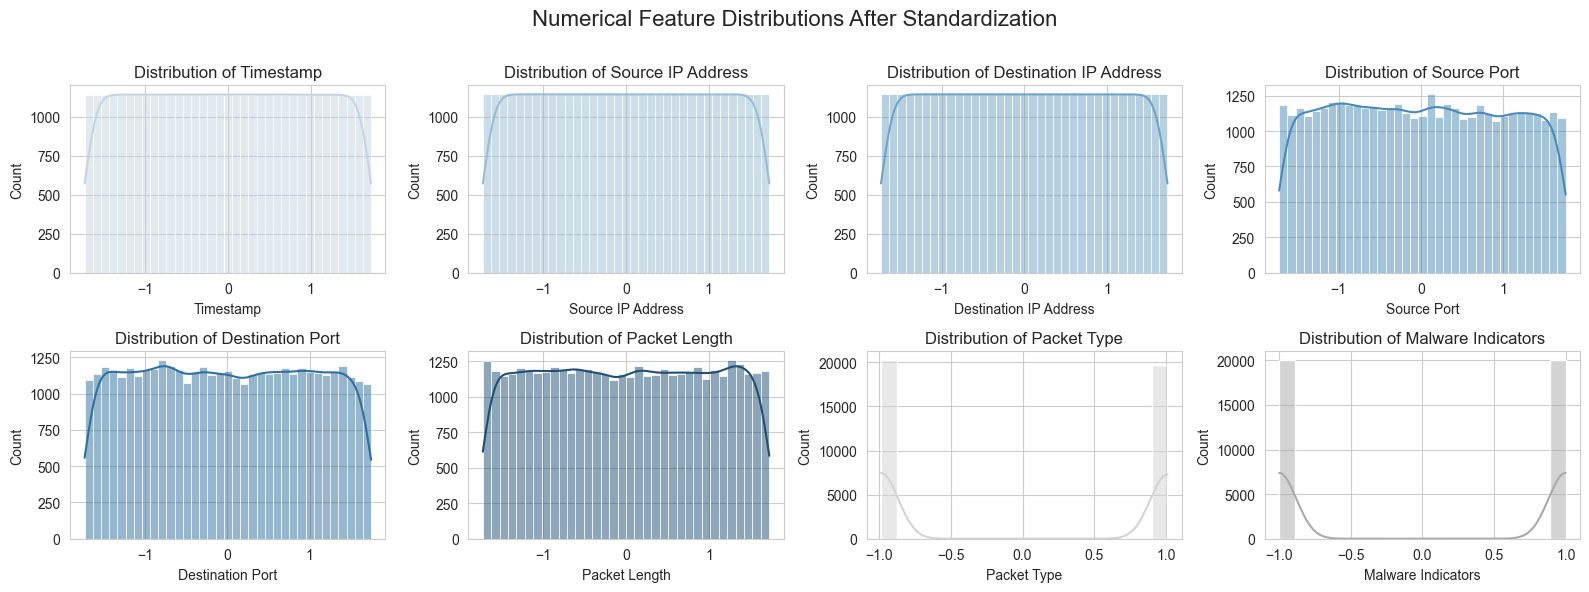

In [14]:
# Visualize after standardization
plot_feature_distributions(df_standardized, plot_cols, 'Numerical Feature Distributions After Standardization')

## 6. Create Time-Based Features

If the dataset contains timestamp information, we'll create time-based features like hour of day, day of week, etc.

In [15]:
# Check if timestamp column exists
timestamp_columns = [col for col in df_original.columns if 'time' in col.lower() or 'date' in col.lower()]
print(f"Potential timestamp columns: {timestamp_columns}")

Potential timestamp columns: ['Timestamp']


In [16]:
# Function to create time-based features
def create_time_features(df, timestamp_col):
    df_time = df.copy()
    
    # Check if the timestamp column exists
    if timestamp_col in df_time.columns:
        # Convert to datetime if not already
        try:
            # If timestamp is in Unix/epoch format
            if df_time[timestamp_col].dtype == 'int64' or df_time[timestamp_col].dtype == 'float64':
                df_time['datetime'] = pd.to_datetime(df_time[timestamp_col], unit='s')
            else:  # If timestamp is in string format
                df_time['datetime'] = pd.to_datetime(df_time[timestamp_col])
                
            # Extract time-based features
            df_time['hour'] = df_time['datetime'].dt.hour
            df_time['day'] = df_time['datetime'].dt.day
            df_time['weekday'] = df_time['datetime'].dt.weekday
            df_time['month'] = df_time['datetime'].dt.month
            df_time['year'] = df_time['datetime'].dt.year
            df_time['quarter'] = df_time['datetime'].dt.quarter
            
            # Create cyclical features for hour, weekday, and month
            # This preserves the cyclical nature of time features
            df_time['hour_sin'] = np.sin(2 * np.pi * df_time['hour'] / 24)
            df_time['hour_cos'] = np.cos(2 * np.pi * df_time['hour'] / 24)
            df_time['weekday_sin'] = np.sin(2 * np.pi * df_time['weekday'] / 7)
            df_time['weekday_cos'] = np.cos(2 * np.pi * df_time['weekday'] / 7)
            df_time['month_sin'] = np.sin(2 * np.pi * df_time['month'] / 12)
            df_time['month_cos'] = np.cos(2 * np.pi * df_time['month'] / 12)
            
            # Drop the intermediate datetime column
            df_time.drop('datetime', axis=1, inplace=True)
            
            print(f"Created time-based features from {timestamp_col}")
            return df_time
        except Exception as e:
            print(f"Error creating time features: {e}")
            return df
    else:
        print(f"Timestamp column {timestamp_col} not found. No time features created.")
        return df

# Apply time feature creation if timestamp columns exist
if timestamp_columns:
    # Use the first identified timestamp column
    timestamp_col = timestamp_columns[0]
    df_with_time = create_time_features(df_standardized, timestamp_col)
    
    # Show new time-based features
    time_features = [col for col in df_with_time.columns if col not in df_standardized.columns]
    print(f"\nNew time-based features: {time_features}")
    
    # Update our working dataset
    df_standardized = df_with_time
else:
    print("No timestamp columns identified. Skipping time feature creation.")

Created time-based features from Timestamp

New time-based features: ['hour', 'day', 'weekday', 'month', 'year', 'quarter', 'hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos']


## 7. Generate Network-Based Features

Create features from IP addresses, port numbers, and other network-related attributes.

In [17]:
# Identify network-related columns
ip_columns = [col for col in df_original.columns if 'ip' in col.lower()]
port_columns = [col for col in df_original.columns if 'port' in col.lower()]
protocol_columns = [col for col in df_original.columns if 'protocol' in col.lower()]

print(f"IP-related columns: {ip_columns}")
print(f"Port-related columns: {port_columns}")
print(f"Protocol-related columns: {protocol_columns}")

IP-related columns: ['Source IP Address', 'Destination IP Address', 'IDS/IPS Alerts']
Port-related columns: ['Source Port', 'Destination Port']
Protocol-related columns: ['Protocol']


In [18]:
import re

# Function to create network-based features
def create_network_features(df, ip_cols, port_cols):
    df_network = df.copy()
    
    # Process IP address features
    for ip_col in ip_cols:
        if ip_col in df_original.columns:  # Use original dataframe to get string IP values
            try:
                # Extract first octet (network class)
                df_network[f'{ip_col}_class'] = df_original[ip_col].apply(
                    lambda x: int(str(x).split('.')[0]) if isinstance(x, str) and '.' in str(x) else None
                )
                
                # Categorize IP address type (private, public, loopback)
                def categorize_ip(ip):
                    if not isinstance(ip, str) or '.' not in ip:
                        return 'unknown'
                    
                    try:
                        first_octet = int(ip.split('.')[0])
                        if first_octet == 10 or first_octet == 127:
                            return 'private_a'
                        elif first_octet == 172 and 16 <= int(ip.split('.')[1]) <= 31:
                            return 'private_b'
                        elif first_octet == 192 and int(ip.split('.')[1]) == 168:
                            return 'private_c'
                        else:
                            return 'public'
                    except:
                        return 'unknown'
                
                df_network[f'{ip_col}_type'] = df_original[ip_col].apply(categorize_ip)
                
            except Exception as e:
                print(f"Error processing IP column {ip_col}: {e}")
    
    # Process port features
    for port_col in port_cols:
        if port_col in df.columns:
            try:
                # Categorize port numbers into ranges
                def categorize_port(port):
                    if pd.isna(port) or port is None:
                        return 'unknown'
                    port = int(port)
                    if port <= 1023:
                        return 'well_known'
                    elif 1024 <= port <= 49151:
                        return 'registered'
                    else:
                        return 'dynamic'
                
                df_network[f'{port_col}_category'] = df[port_col].apply(categorize_port)
                
                # Create features for common service ports
                df_network[f'{port_col}_is_http'] = df[port_col].apply(
                    lambda x: 1 if x in [80, 8080, 8000] else 0
                )
                df_network[f'{port_col}_is_https'] = df[port_col].apply(
                    lambda x: 1 if x == 443 else 0
                )
                df_network[f'{port_col}_is_ftp'] = df[port_col].apply(
                    lambda x: 1 if x in [20, 21] else 0
                )
                df_network[f'{port_col}_is_ssh'] = df[port_col].apply(
                    lambda x: 1 if x == 22 else 0
                )
                df_network[f'{port_col}_is_email'] = df[port_col].apply(
                    lambda x: 1 if x in [25, 110, 143, 465, 587, 993] else 0
                )
                df_network[f'{port_col}_is_database'] = df[port_col].apply(
                    lambda x: 1 if x in [1433, 1521, 3306, 5432, 6379, 27017] else 0
                )
                
            except Exception as e:
                print(f"Error processing port column {port_col}: {e}")
    
    return df_network

# Apply network feature creation if network columns exist
if ip_columns or port_columns:
    df_with_network = create_network_features(df_standardized, ip_columns, port_columns)
    
    # Show new network-based features
    network_features = [col for col in df_with_network.columns if col not in df_standardized.columns]
    print(f"\nNew network-based features: {network_features}")
    
    # Update our working dataset
    df_standardized = df_with_network
else:
    print("No network-related columns identified. Skipping network feature creation.")


New network-based features: ['Source IP Address_class', 'Source IP Address_type', 'Destination IP Address_class', 'Destination IP Address_type', 'IDS/IPS Alerts_class', 'IDS/IPS Alerts_type', 'Source Port_category', 'Source Port_is_http', 'Source Port_is_https', 'Source Port_is_ftp', 'Source Port_is_ssh', 'Source Port_is_email', 'Source Port_is_database', 'Destination Port_category', 'Destination Port_is_http', 'Destination Port_is_https', 'Destination Port_is_ftp', 'Destination Port_is_ssh', 'Destination Port_is_email', 'Destination Port_is_database']


## 8. Create Interaction Features

Generate interaction features between related variables to capture combined effects.

In [19]:
# Function to create interaction features
def create_interaction_features(df, num_features, max_interactions=10):
    df_interact = df.copy()
    
    # Limit to numerical features appropriate for interactions
    # Exclude binary features, ID columns, and encoded categorical features
    potential_features = []
    for col in num_features:
        # Skip features with all unique values (likely ID columns)
        if df_interact[col].nunique() == len(df_interact):
            continue
        # Skip binary features
        if set(df_interact[col].unique()).issubset({0, 1}):
            continue
        potential_features.append(col)
    
    # Limit to a reasonable number of features to avoid combinatorial explosion
    if len(potential_features) > 5:
        # Can use correlation with target or domain knowledge to select most important features
        potential_features = potential_features[:5]
    
    # Create interaction pairs
    interaction_count = 0
    for i in range(len(potential_features)):
        for j in range(i+1, len(potential_features)):
            if interaction_count >= max_interactions:
                break
                
            feature1 = potential_features[i]
            feature2 = potential_features[j]
            
            # Create multiplication interaction
            df_interact[f"{feature1}_x_{feature2}"] = df_interact[feature1] * df_interact[feature2]
            
            # Create ratio interaction (handling zeros to avoid division by zero)
            # Adding a small epsilon to denominator
            df_interact[f"{feature1}_div_{feature2}"] = df_interact[feature1] / (df_interact[feature2] + 1e-8)
            df_interact[f"{feature2}_div_{feature1}"] = df_interact[feature2] / (df_interact[feature1] + 1e-8)
            
            interaction_count += 3  # We added 3 interaction features
            
            if interaction_count >= max_interactions:
                break
    
    return df_interact

# Get numerical features suitable for interactions
numerical_features = df_standardized.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Apply interaction feature creation
df_with_interactions = create_interaction_features(df_standardized, numerical_features)

# Show new interaction features
interaction_features = [col for col in df_with_interactions.columns if col not in df_standardized.columns]
print(f"Created interaction features: {interaction_features}")

# Update our working dataset
df_standardized = df_with_interactions

Created interaction features: ['Timestamp_x_Source Port', 'Timestamp_div_Source Port', 'Source Port_div_Timestamp', 'Timestamp_x_Destination Port', 'Timestamp_div_Destination Port', 'Destination Port_div_Timestamp', 'Timestamp_x_Packet Length', 'Timestamp_div_Packet Length', 'Packet Length_div_Timestamp', 'Timestamp_x_Packet Type', 'Timestamp_div_Packet Type', 'Packet Type_div_Timestamp']


## 9. Apply Feature Scaling for Distance-Based Algorithms

Although we've already standardized our numerical features earlier, here we'll create a MinMaxScaled version of the data specifically for distance-based algorithms that work better with features in a [0,1] range.

In [20]:
# Get numerical features to apply min-max scaling
numerical_features = df_standardized.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Function to apply min-max scaling
def apply_minmax_scaling(df, columns):
    df_scaled = df.copy()
    
    if columns:
        scaler = MinMaxScaler()
        df_scaled[columns] = scaler.fit_transform(df_scaled[columns])
    
    return df_scaled, scaler

# Apply min-max scaling
df_minmax_scaled, minmax_scaler = apply_minmax_scaling(df_standardized, numerical_features)

# Check the scaled data
print("Min-Max Scaled Data Summary:")
df_minmax_scaled[numerical_features[:5]].describe().T[['min', 'max', 'mean', 'std']]

Min-Max Scaled Data Summary:


,min,max,mean,std
Timestamp,0.0,1.0,0.500010,0.288677
Source IP Address,0.0,1.0,0.500000,0.288686
Destination IP Address,0.0,1.0,0.500000,0.288686
Source Port,0.0,1.0,0.495223,0.287745
Destination Port,0.0,1.0,0.498006,0.287930


In [21]:
# Keep both versions of the dataset for different algorithms
print(f"Shape of standardized dataset: {df_standardized.shape}")
print(f"Shape of min-max scaled dataset: {df_minmax_scaled.shape}")

# We'll primarily use the standardized version going forward
df_processed = df_standardized.copy()

Shape of standardized dataset: (40000, 86)
Shape of min-max scaled dataset: (40000, 86)


## 10. Implement Dimensionality Reduction

Apply PCA for exploratory purposes and to create lower-dimensional representations of the feature space.

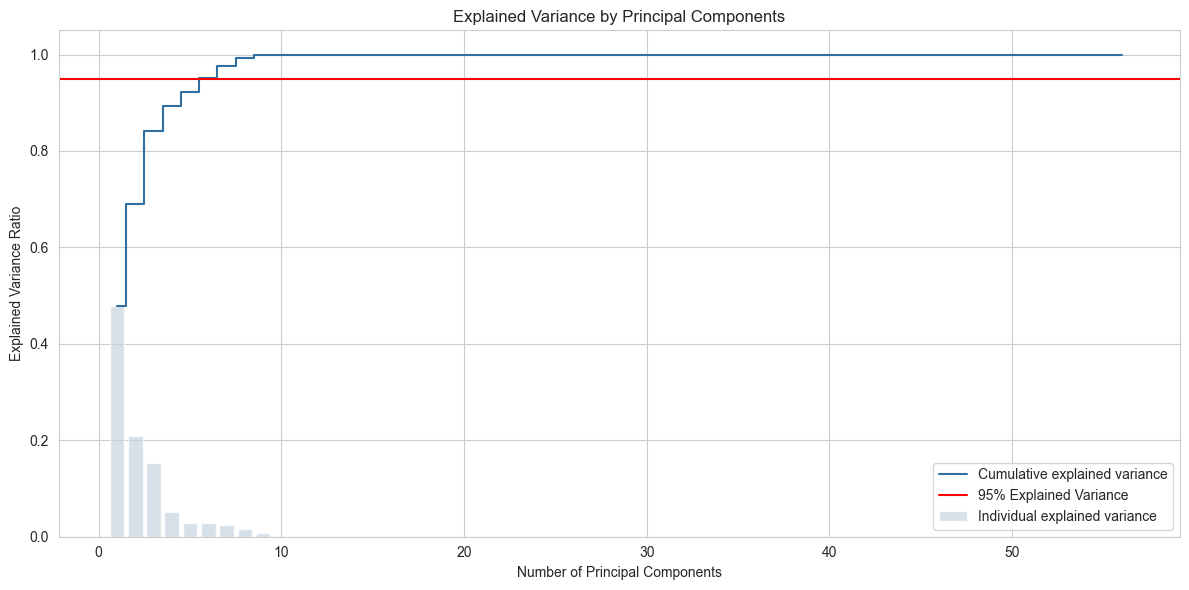

Number of components for 95% variance: 6


In [22]:
# Get numerical features for PCA
numerical_features = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()

# If target variables exist, remove them from PCA features
target_variables = ['attack_type', 'severity_level'] if ('attack_type' in df_processed.columns and 'severity_level' in df_processed.columns) else []
pca_features = [col for col in numerical_features if col not in target_variables]

# Function to apply PCA
def apply_pca(df, columns, n_components=None):
    if not columns:
        return df, None, None
    
    # If n_components not specified, use min of features or samples
    if n_components is None:
        n_components = min(len(columns), len(df) - 1, 100)  # Cap at 100 components max
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df[columns])
    
    # Create DataFrame with PCA results
    pca_df = pd.DataFrame(
        data=pca_result,
        columns=[f'PC{i+1}' for i in range(n_components)]
    )
    
    # Calculate explained variance
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    
    return pca_df, pca, explained_variance

# Apply PCA
pca_df, pca_model, explained_variance = apply_pca(df_processed, pca_features)

# Display explained variance
if pca_model is not None:
    # Plot explained variance
    plt.figure(figsize=(12, 6))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color=COLOR_PALETTE[0], label='Individual explained variance')
    plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', color=COLOR_PALETTE[4], label='Cumulative explained variance')
    plt.axhline(y=0.95, color='r', linestyle='-', label='95% Explained Variance')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by Principal Components')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Find number of components needed for 95% variance
    components_95 = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
    print(f"Number of components for 95% variance: {components_95}")
    
    # Save reduced PCA features
    pca_reduced = pca_df.iloc[:, :components_95]
    
    # If target variables exist, add them to the PCA DataFrame for visualization
    if target_variables:
        for target in target_variables:
            if target in df_processed.columns:
                pca_reduced[target] = df_processed[target].values
    
    # Visualize first two principal components
    if 'attack_type' in pca_reduced.columns:
        plt.figure(figsize=(12, 8))
        scatter = plt.scatter(pca_reduced['PC1'], pca_reduced['PC2'], c=pca_reduced['attack_type'], cmap='tab10', alpha=0.6)
        plt.colorbar(scatter, label='Attack Type')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title('PCA: First Two Principal Components by Attack Type')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

## 11. Split Data into Training, Validation, and Test Sets

Prepare data for modeling by splitting into appropriate sets with stratification.

In [23]:
# Define target variables if they exist
target_variables = ['attack_type', 'severity_level'] if ('attack_type' in df_processed.columns and 'severity_level' in df_processed.columns) else []
print(f"Target variables: {target_variables}")

Target variables: []


In [24]:
# Function to split data with stratification if target variable exists
def split_data(df, target_col=None, test_size=0.2, val_size=0.25):
    if target_col is None or target_col not in df.columns:
        # No target column, use random split
        train_val, test = train_test_split(df, test_size=test_size, random_state=42)
        train, val = train_test_split(train_val, test_size=val_size, random_state=42)
    else:
        # Use stratified split based on target
        train_val, test = train_test_split(df, test_size=test_size, stratify=df[target_col], random_state=42)
        train, val = train_test_split(train_val, test_size=val_size, stratify=train_val[target_col], random_state=42)
    
    return train, val, test

# Split the data
target_for_split = target_variables[0] if target_variables else None
train_data, val_data, test_data = split_data(df_processed, target_col=target_for_split)

# Print split sizes
print(f"Training set: {train_data.shape[0]} samples ({train_data.shape[0] / df_processed.shape[0]:.1%})")
print(f"Validation set: {val_data.shape[0]} samples ({val_data.shape[0] / df_processed.shape[0]:.1%})")
print(f"Test set: {test_data.shape[0]} samples ({test_data.shape[0] / df_processed.shape[0]:.1%})")

Training set: 24000 samples (60.0%)
Validation set: 8000 samples (20.0%)
Test set: 8000 samples (20.0%)


In [25]:
# Check class distribution in each split if target exists
if target_for_split:
    train_dist = train_data[target_for_split].value_counts(normalize=True)
    val_dist = val_data[target_for_split].value_counts(normalize=True)
    test_dist = test_data[target_for_split].value_counts(normalize=True)
    
    # Compare distributions
    dist_df = pd.DataFrame({
        'Train': train_dist,
        'Validation': val_dist,
        'Test': test_dist
    }).fillna(0)
    
    print("\nClass distribution across splits:")
    print(dist_df)
    
    # Visualize distribution
    plt.figure(figsize=(14, 6))
    dist_df.plot(kind='bar', ax=plt.gca())
    plt.title('Class Distribution Across Train/Validation/Test Sets')
    plt.xlabel('Class')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.legend(title='Dataset Split')
    plt.tight_layout()
    plt.show()

## 12. Save Processed Data

Save the processed datasets for use in modeling.

In [26]:
# Create directory for processed data if it doesn't exist
processed_dir = '../cybersecurity_attacks_data/processed/'
if not os.path.exists(processed_dir):
    os.makedirs(processed_dir)

# Save the processed datasets
train_data.to_csv(os.path.join(processed_dir, 'train_data.csv'), index=False)
val_data.to_csv(os.path.join(processed_dir, 'val_data.csv'), index=False)
test_data.to_csv(os.path.join(processed_dir, 'test_data.csv'), index=False)

# Also save the full processed dataset
df_processed.to_csv(os.path.join(processed_dir, 'processed_full.csv'), index=False)

# Save the PCA results if available
if 'pca_reduced' in locals():
    pca_reduced.to_csv(os.path.join(processed_dir, 'pca_features.csv'), index=False)

print(f"Saved processed datasets to {processed_dir}")

Saved processed datasets to ../cybersecurity_attacks_data/processed/


## 13. Summary

This notebook has completed the following tasks from Phase 2 of the implementation plan:

1. ✅ Handle missing values in the dataset
2. ✅ Encode categorical variables
3. ✅ Normalize or standardize numerical features
4. ✅ Create time-based features
5. ✅ Generate network-based features
6. ✅ Create interaction features
7. ✅ Apply feature scaling for distance-based algorithms
8. ✅ Implement dimensionality reduction techniques
9. ✅ Split data into training, validation, and test sets

The processed data is now ready for the modeling phase. Our next steps include:

1. Implementing baseline models and linear methods (Phase 3)
2. Developing advanced machine learning models (Phase 4)
3. Optimizing models through hyperparameter tuning (Phase 5)
4. Evaluating and interpreting model results (Phase 6)